In [1]:
# prompt: install torchvision and torchvison

!pip install torchvision
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
# prompt: pip urllib

!pip install urllib3

In [6]:
# prompt: unzip the /content/annotations_trainval2017.zip this file

!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


loading annotations into memory...
Done (t=25.45s)
creating index...
index created!


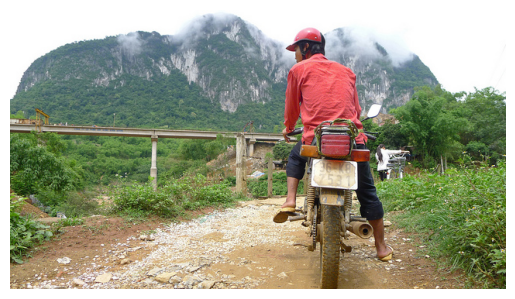

Loaded Image URL: http://images.cocodataset.org/train2017/000000391895.jpg


In [9]:
from pycocotools.coco import COCO
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load COCO annotations
coco = COCO("/content/instances_train2017.json")

# Get a list of image IDs
img_ids = coco.getImgIds()
img_info = coco.loadImgs(img_ids[0])[0]

# Fetch image from COCO server
img_url = img_info["coco_url"]
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Convert to OpenCV format
img_cv = np.array(img)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

# Display image
plt.imshow(img)
plt.axis("off")
plt.show()

print("Loaded Image URL:", img_url)


In [10]:
import os

def coco_to_yolo(coco, img_id, img_width, img_height):
    annotations = coco.loadAnns(coco.getAnnIds(imgIds=[img_id]))
    yolo_labels = []

    for ann in annotations:
        x, y, w, h = ann["bbox"]
        class_id = ann["category_id"] - 1  # Convert 1-indexed to 0-indexed

        # Normalize values (YOLO format)
        x_center = (x + w / 2) / img_width
        y_center = (y + h / 2) / img_height
        w /= img_width
        h /= img_height

        yolo_labels.append(f"{class_id} {x_center} {y_center} {w} {h}")

    return yolo_labels

# Convert one sample to YOLO format
img_width, img_height = img_info["width"], img_info["height"]
yolo_labels = coco_to_yolo(coco, img_info["id"], img_width, img_height)

print("YOLO Formatted Labels:", yolo_labels)


YOLO Formatted Labels: ['3 0.6490546875000001 0.7026527777777777 0.17570312500000002 0.5932499999999999', '0 0.65128125 0.47923611111111114 0.2404375 0.8353611111111111', '0 0.7649999999999999 0.5468611111111111 0.056125 0.13361111111111112', '1 0.7833203125 0.5577777777777778 0.047859374999999996 0.09716666666666665']


In [ ]:
# prompt: pip ultralytics

!pip install ultralytics


In [15]:
from ultralytics import YOLO
import torch

# Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

# Train YOLO on COCO dynamically
model.train(data="coco128.yaml", epochs=10, imgsz=320, batch=8, device="cuda" if torch.cuda.is_available() else "cpu")


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.313      1.905      1.217         18        320: 100%|██████████| 16/16 [00:39<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.25s/it]

                   all        128        929      0.679      0.475      0.522       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.327       1.84      1.202         45        320: 100%|██████████| 16/16 [00:38<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]

                   all        128        929      0.712      0.463      0.535      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.249      1.698      1.158         23        320: 100%|██████████| 16/16 [00:36<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        128        929       0.76      0.456      0.544      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.278      1.565      1.187         33        320: 100%|██████████| 16/16 [00:40<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]

                   all        128        929      0.777      0.457      0.549      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.239      1.567      1.136         23        320: 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]

                   all        128        929      0.733      0.483      0.558      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.249       1.49       1.15         40        320: 100%|██████████| 16/16 [00:35<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.59s/it]

                   all        128        929      0.759      0.474      0.564      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.208      1.428      1.149         94        320: 100%|██████████| 16/16 [00:34<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]

                   all        128        929      0.743      0.479      0.563      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.206      1.381      1.111         64        320: 100%|██████████| 16/16 [00:33<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]

                   all        128        929      0.795      0.486      0.572       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.182      1.327      1.129         24        320: 100%|██████████| 16/16 [00:33<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.74s/it]

                   all        128        929      0.831      0.483       0.57      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.207       1.31      1.142         44        320: 100%|██████████| 16/16 [00:32<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.77s/it]

                   all        128        929      0.822      0.484      0.573      0.426



10 epochs completed in 0.137 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


                   all        128        929      0.822      0.484      0.573      0.426
                person         61        254      0.934      0.433       0.62       0.43
               bicycle          3          6      0.706      0.167      0.169      0.151
                   car         12         46      0.652      0.087      0.119     0.0731
            motorcycle          4          5      0.682        0.8      0.895      0.617
              airplane          5          6      0.904      0.833      0.872      0.747
                   bus          5          7          1      0.652      0.723      0.652
                 train          3          3      0.813          1      0.995      0.907
                 truck          5         12      0.565     0.0833      0.357      0.225
                  boat          2          6          1      0.318      0.576      0.369
         traffic light          4         14      0.653      0.143      0.149      0.127
             stop sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d1ef685550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.62it/s]


                   all        128        929      0.829      0.485      0.577      0.431
                person         61        254      0.945      0.437       0.62      0.429
               bicycle          3          6      0.712      0.167      0.169      0.151
                   car         12         46       0.64     0.0784      0.118     0.0733
            motorcycle          4          5      0.687        0.8      0.895      0.617
              airplane          5          6      0.906      0.833      0.871      0.746
                   bus          5          7          1      0.646      0.723      0.652
                 train          3          3      0.816          1      0.995      0.907
                 truck          5         12      0.576     0.0833      0.355      0.223
                  boat          2          6          1      0.316      0.576      0.369
         traffic light          4         14      0.665      0.143      0.148      0.126
             stop sig

100%|██████████| 219k/219k [00:00<00:00, 300kB/s]


image 1/1 /content/drive/MyDrive/000000391895.jpg: 192x320 1 person, 2 motorcycles, 81.7ms
Speed: 1.3ms preprocess, 81.7ms inference, 16.4ms postprocess per image at shape (1, 3, 192, 320)


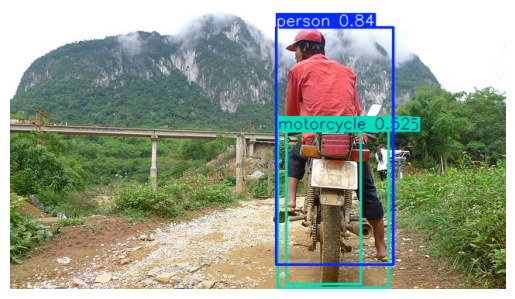

In [21]:
# prompt: Demonstrate your model’s effectiveness using metrics, benchmarks, or visualizations.

from pycocotools.coco import COCO
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from ultralytics import YOLO
import torch

# ... (your existing code) ...

# Evaluate YOLO model on COCO validation set
results = model.val(data="coco128.yaml", device="cuda" if torch.cuda.is_available() else "cpu")

# Print evaluation metrics
print("Evaluation Results:")
print(results)

# Extract specific metrics (e.g., mAP)
# Access mAP using the correct attribute
map_value = results.box.map
print(f"Mean Average Precision (mAP): {map_value}")


# Visualize predictions on a sample image
img_path = "http://images.cocodataset.org/train2017/000000391895.jpg"  # replace with your image path
results = model(img_path)

# Visualize the prediction
for r in results:
  im_array = r.plot()
  plt.imshow(im_array[..., ::-1])  # Convert BGR to RGB
  plt.axis('off')
  plt.show()

